In [0]:
sc

SparkContext 

 Spark UI 

 
 Version 
 v3.1.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
%fs
ls /FileStore/tables/

path,name,size
dbfs:/FileStore/tables/Deposit_bank__1_.ipynb,Deposit_bank__1_.ipynb,2584041
dbfs:/FileStore/tables/Federal_Deposit_Insurance_Corporation_FDIC_Insured_Banks.csv,Federal_Deposit_Insurance_Corporation_FDIC_Insured_Banks.csv,39785927
dbfs:/FileStore/tables/PS_20174392719_1491204439457_log.csv,PS_20174392719_1491204439457_log.csv,493534783
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-1.csv,SmokingAndTobaccoData2008-1.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-2.csv,SmokingAndTobaccoData2008-2.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-3.csv,SmokingAndTobaccoData2008-3.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-4.csv,SmokingAndTobaccoData2008-4.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-5.csv,SmokingAndTobaccoData2008-5.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-6.csv,SmokingAndTobaccoData2008-6.csv,33232
dbfs:/FileStore/tables/SmokingAndTobaccoData2008-7.csv,SmokingAndTobaccoData2008-7.csv,33232


In [0]:
# File location and type
file_location = "/FileStore/tables/Federal_Deposit_Insurance_Corporation_FDIC_Insured_Banks.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df.registerTempTable("adult")


display(df.take(3))

FID,ADDRESBR,BRNUM,BRSERTYP,CBSABR,CBSANAMB,CITYBR,CNTRYNAB,CNTYNAMB,DEPSUMBR,GEOCODE_CE,GEOCODE__1,NAMEBR,STALPBR,STCNTYBR,STNAMEBR,UNINUMBR,ZIPBR,CERT,ADDRESS,ASSET,BKCLASS,CITY,CNTRYNA,DENOVO,DEPDOM,NAMEFULL,NAMEHCR,REGAGNT,REPDTE,RSSDID,STALP,STCNTY,STNAME,ZIP,BKMO,LOC_NAME,STATUS,SCORE,x,y,GeocodeSou
13001,950 Park Street,0,11,14460,"Boston-Cambridge-Newton, MA-NH",Stoughton,United States,Norfolk,46645,2007,456101,Stoughton Co-Operative Bank,MA,25021,Massachusetts,33215,2072,26513,950 Park Street,96326,SM,Stoughton,United States,0,75160,Stoughton Co-operative Bank,,FED,2014-06-30T00:00:00.000+0000,164975,MA,25021,MASSACHUSETTS,2072,1,PointAddress,M,100,-71.073321,42.111569,HSIP USA_ZIP4 Composite
13002,97 Lowell Road,360,11,14460,"Boston-Cambridge-Newton, MA-NH",Concord,United States,Middlesex,154554,1039,361300,Concord Branch,MA,25017,Massachusetts,33217,1742,57957,One Citizens Plaza,100642478,N,Providence,United States,0,68755303,"Citizens Bank, National Association",UK FINANCIAL INVESTMENTS LIMITED,OCC,2014-06-30T00:00:00.000+0000,3303298,RI,44007,RHODE ISLAND,2903,0,PointAddress,M,100,-71.352231,42.463779,HSIP USA_ZIP4 Composite
13003,342 Main Street,0,11,14460,"Boston-Cambridge-Newton, MA-NH",Wakefield,United States,Middlesex,74480,4016,335100,Wakefield Co-Operative Bank,MA,25017,Massachusetts,33218,1880,26516,342 Main Street,174742,SB,Wakefield,United States,0,147124,Wakefield Co-operative Bank,,FDIC,2014-06-30T00:00:00.000+0000,330873,MA,25017,MASSACHUSETTS,1880,1,PointAddress,M,100,-71.071241,42.504579,HSIP USA_ZIP4 Composite


In [0]:
df.count() == df.na.drop().count()

Out[4]: True

In [0]:
df.count() == df.drop_duplicates().count()

Out[5]: True

1. How much percent of the total deposit do the 1% of institutes with highest deposits have? 

2. Visualize banking department (REGNANT) distribution on a piechart.

3. Visualize total deposits (DEPSUMBR) per banking department (REGNANT).

## 1. Pandas way

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df_pandas = df.toPandas()
df_pandas.head(3)

,FID,ADDRESBR,BRNUM,BRSERTYP,CBSABR,CBSANAMB,CITYBR,CNTRYNAB,CNTYNAMB,DEPSUMBR,...,STCNTY,STNAME,ZIP,BKMO,LOC_NAME,STATUS,SCORE,x,y,GeocodeSou
0,13001,950 Park Street,0,11,14460,"Boston-Cambridge-Newton, MA-NH",Stoughton,United States,Norfolk,46645,...,25021,MASSACHUSETTS,2072,1,PointAddress,M,100,-71.073321,42.111569,HSIP USA_ZIP4 Composite
1,13002,97 Lowell Road,360,11,14460,"Boston-Cambridge-Newton, MA-NH",Concord,United States,Middlesex,154554,...,44007,RHODE ISLAND,2903,0,PointAddress,M,100,-71.352231,42.463779,HSIP USA_ZIP4 Composite
2,13003,342 Main Street,0,11,14460,"Boston-Cambridge-Newton, MA-NH",Wakefield,United States,Middlesex,74480,...,25017,MASSACHUSETTS,1880,1,PointAddress,M,100,-71.071241,42.504579,HSIP USA_ZIP4 Composite


In [0]:
df_todo = df_pandas[['REGAGNT','DEPSUMBR']] 
df_todo.head()

,REGAGNT,DEPSUMBR
0,FED,46645
1,OCC,154554
2,FDIC,74480
3,FDIC,144528
4,FDIC,34860


1. How much percent of the total deposit do the 1% of institutes with highest deposits have?

In [0]:
top = df_todo.sort_values(by='DEPSUMBR',ascending=False) 
top.head()

,REGAGNT,DEPSUMBR
15449,OCC,274497382
70997,OCC,241540582
9446,OCC,140796389
5528,FED,125192841
9448,OCC,120568155


In [0]:
suma = df_todo['DEPSUMBR'].sum()  
suma

Out[10]: 10112715901

In [0]:
y = top.nlargest(int(len(top.index) / 100), 'DEPSUMBR').sum()
z = y['DEPSUMBR']

procent = z / suma
rest = 1 - procent

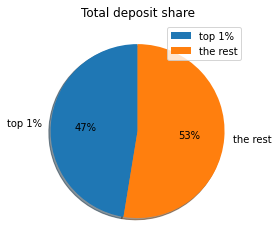

In [0]:
data_table = ['top 1%', 'the rest'] 
  

data = [procent, rest] 
plt.pie(data, labels = data_table, startangle=90, shadow = True, autopct = '%1.0f%%') 
plt.title ('Total deposit share')
plt.legend() 
plt.show()


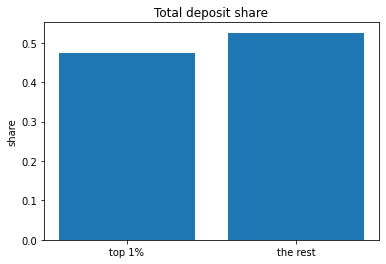

In [0]:
bar_name = ['top 1%', 'the rest'] 
  
y = np.arange(len(data))
data = [procent, rest] 

plt.bar(y, data, align='center')
plt.xticks(y, bar_name)
plt.ylabel('share')
plt.title('Total deposit share')
plt.show()

2.Visualize banking department (REGNANT) distribution on a piechart.

Out[14]: OCC     48603
FDIC    31237
FED     14885
Name: REGAGNT, dtype: int64

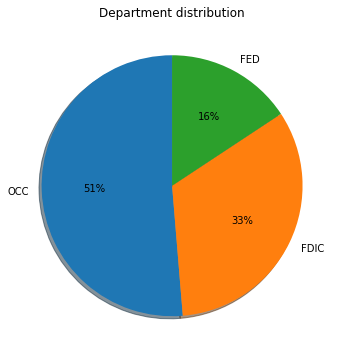

In [0]:
department = df_todo['REGAGNT'].value_counts()


plt.figure(figsize=(12,6))
plt.title ('Department distribution')
plt.pie(department,labels= department.index, autopct='%1.0f%%',startangle=90,shadow=True);
department

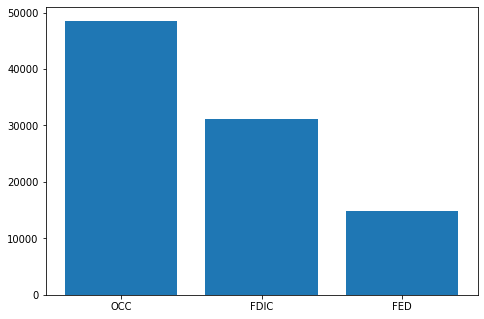

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(department.index,department)
plt.show()

Out[16]: <AxesSubplot:title={'center':'Department distribution'}, ylabel='REGAGNT'>

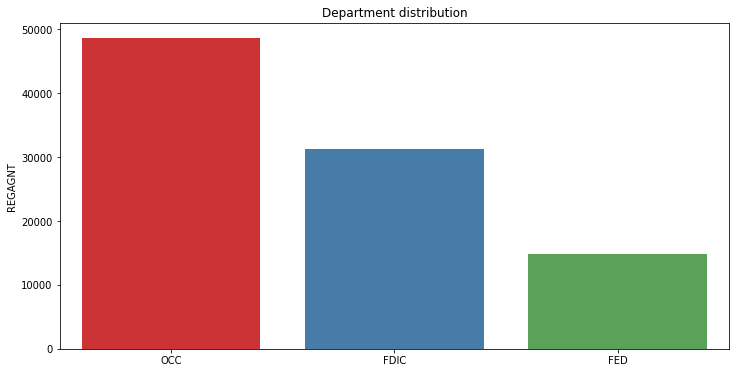

In [0]:
plt.figure(figsize=(12,6))
plt.title ('Department distribution')
sns.barplot(x=department.index, y= department, palette='Set1')

3.Visualize total deposits (DEPSUMBR) per banking department (REGNANT).

Out[17]: REGAGNT
FDIC    2.021246e+09
FED     1.445246e+09
OCC     6.646223e+09
Name: DEPSUMBR, dtype: float64

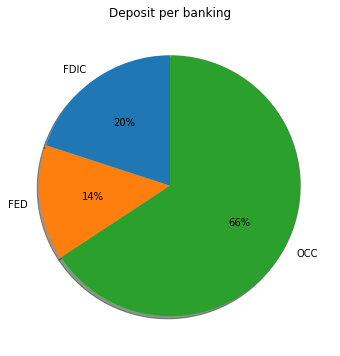

In [0]:
deposit = df_todo.groupby(['REGAGNT'])['DEPSUMBR'].sum()
plt.figure(figsize=(12,6))
plt.title ('Deposit per banking')
plt.pie(deposit,labels= deposit.index, autopct='%1.0f%%',startangle=90,shadow=True)

deposit

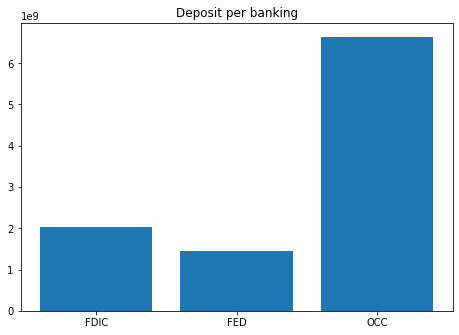

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(deposit.index,deposit)
plt.title ('Deposit per banking')
plt.show()

Out[19]: <AxesSubplot:title={'center':'Deposit per banking'}, xlabel='REGAGNT', ylabel='DEPSUMBR'>

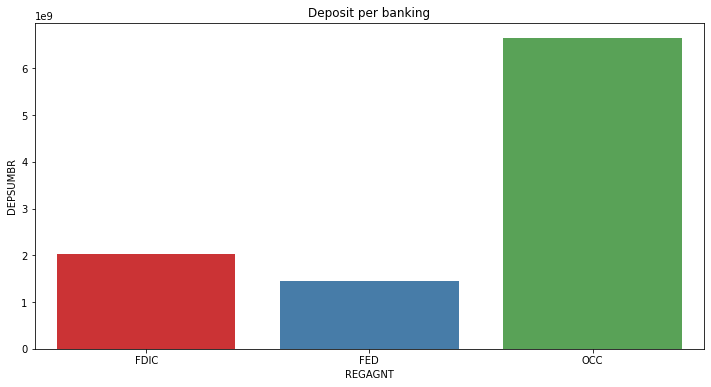

In [0]:
plt.figure(figsize=(12,6))
plt.title ('Deposit per banking')
sns.barplot(x=deposit.index, y= deposit, palette='Set1')


## SQL way

1. How much percent of the total deposit do the 1% of institutes with highest deposits have?

In [0]:
sqlresult= sqlContext.sql("select sum(DEPSUMBR) as suma, count(*) as count from adult")
suma = sqlresult.collect()[0][0]
count = sqlresult.collect()[0][1]
suma

Out[20]: 10112715901

In [0]:
sqlresult= sqlContext.sql("select DEPSUMBR from adult order by DEPSUMBR desc limit {}".format(int(count / 100)))
df = sqlresult.groupby().sum()
wartosc1 = df.collect()[0][0]
wartosc1

Out[21]: 4795232817

In [0]:
bar1 = wartosc1 / suma
bar2 = (suma - wartosc1) / suma


plot = [{"share": bar1, "Total deposit share": "top 1%"}, {"share": bar2, "Total deposit share": "the rest"}]
df_sql = spark.createDataFrame(plot)
display(df_sql)


Total deposit share,share
top 1%,0.47417853561235923
the rest,0.5258214643876408


2.Visualize banking department (REGNANT) distribution on a piechart.

In [0]:
%sql 
SELECT REGAGNT as `banking department`, count(*) as `number of institutes`

FROM adult GROUP BY REGAGNT


banking department,number of institutes
FDIC,31237
OCC,48603
FED,14885


3.Visualize total deposits (DEPSUMBR) per banking department (REGNANT).

In [0]:
%sql
select REGAGNT as `banking department`, sum(DEPSUMBR) as `total deposit share` from adult group by REGAGNT;

banking department,total deposit share
FDIC,2021246376
OCC,6646223215
FED,1445246310


In [0]:
# File location and type
file_location = "/FileStore/tables/Federal_Deposit_Insurance_Corporation_FDIC_Insured_Banks.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df.registerTempTable("adult")

display(df.take(3))

FID,ADDRESBR,BRNUM,BRSERTYP,CBSABR,CBSANAMB,CITYBR,CNTRYNAB,CNTYNAMB,DEPSUMBR,GEOCODE_CE,GEOCODE__1,NAMEBR,STALPBR,STCNTYBR,STNAMEBR,UNINUMBR,ZIPBR,CERT,ADDRESS,ASSET,BKCLASS,CITY,CNTRYNA,DENOVO,DEPDOM,NAMEFULL,NAMEHCR,REGAGNT,REPDTE,RSSDID,STALP,STCNTY,STNAME,ZIP,BKMO,LOC_NAME,STATUS,SCORE,x,y,GeocodeSou
13001,950 Park Street,0,11,14460,"Boston-Cambridge-Newton, MA-NH",Stoughton,United States,Norfolk,46645,2007,456101,Stoughton Co-Operative Bank,MA,25021,Massachusetts,33215,2072,26513,950 Park Street,96326,SM,Stoughton,United States,0,75160,Stoughton Co-operative Bank,,FED,2014-06-30T00:00:00.000+0000,164975,MA,25021,MASSACHUSETTS,2072,1,PointAddress,M,100,-71.073321,42.111569,HSIP USA_ZIP4 Composite
13002,97 Lowell Road,360,11,14460,"Boston-Cambridge-Newton, MA-NH",Concord,United States,Middlesex,154554,1039,361300,Concord Branch,MA,25017,Massachusetts,33217,1742,57957,One Citizens Plaza,100642478,N,Providence,United States,0,68755303,"Citizens Bank, National Association",UK FINANCIAL INVESTMENTS LIMITED,OCC,2014-06-30T00:00:00.000+0000,3303298,RI,44007,RHODE ISLAND,2903,0,PointAddress,M,100,-71.352231,42.463779,HSIP USA_ZIP4 Composite
13003,342 Main Street,0,11,14460,"Boston-Cambridge-Newton, MA-NH",Wakefield,United States,Middlesex,74480,4016,335100,Wakefield Co-Operative Bank,MA,25017,Massachusetts,33218,1880,26516,342 Main Street,174742,SB,Wakefield,United States,0,147124,Wakefield Co-operative Bank,,FDIC,2014-06-30T00:00:00.000+0000,330873,MA,25017,MASSACHUSETTS,1880,1,PointAddress,M,100,-71.071241,42.504579,HSIP USA_ZIP4 Composite


## Pyspark

1. How much percent of the total deposit do the 1% of institutes with highest deposits have?

In [0]:
from pyspark.sql.functions import *

In [0]:
all = df.groupBy().sum('DEPSUMBR').collect()[0][0]
all

Out[25]: 10112715901

In [0]:
limit = int(df.count() / 100)
dfsort = df.sort(df.DEPSUMBR.desc()).limit(limit)
top_procent = dfsort.groupBy().sum('DEPSUMBR').collect()[0][0]
top_procent

Out[26]: 4795232817

In [0]:
bar1 = top_procent / all
bar2 = (all - top_procent) / all

plot = [{"share": bar1, "Total deposit share": "top 1%"}, {"share": bar2, "Total deposit share": "the rest"}]
df_wynik = spark.createDataFrame(plot)
display(df_wynik)

Total deposit share,share
top 1%,0.47417853561235923
the rest,0.5258214643876408


2.Visualize banking department (REGNANT) distribution on a piechart.

In [0]:
display(df.select(col("REGAGNT").alias('banking department')).groupBy('banking department').count())

banking department,count
FDIC,31237
OCC,48603
FED,14885


3.Visualize total deposits (DEPSUMBR) per banking department (REGNANT).

In [0]:
from pyspark.sql import functions as func

In [0]:
display(df.select(col("REGAGNT").alias('banking department'), col("DEPSUMBR").alias('DEPSUMBR')).groupBy('banking department').agg(func.sum("DEPSUMBR")))

banking department,sum(DEPSUMBR)
FDIC,2021246376
OCC,6646223215
FED,1445246310
